# REINFORCE

---

In this notebook, we will train REINFORCE with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [1]:
import gym
gym.logger.set_level(40) # suppress warnings (please remove if gives error)
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from torch.distributions import Categorical
import sys, os
sys.path.append(os.path.abspath('..'))
from environment.grid import GridEnv, Action
from enum import Enum

from agent_reinforce.agent import REINFORCEAgent

%load_ext autoreload
%autoreload 2

### 2. Define the Architecture of the Policy

In [2]:
env = GridEnv(1, agents_start = [(1,1)], goals_start=[(7,7)])
env.seed(0)
print('Number of actions: ', env.action_space.n)


Final Self players:  [(1, 1)]
Final Self goals:  [(7, 7)]
Number of actions:  4


In [3]:
env.reset()


[[0.125, 0.125, 0.875, 0.875]]

### 3. Train the Agent with REINFORCE

In [4]:
agent = REINFORCEAgent(env.state_space, env.action_space.n)


In [5]:

def reinforce(n_episodes=3000, max_t=1000, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        saved_log_probs = []
        rewards = []
        state = env.reset()[0]
        for t in range(max_t):
            action, log_prob = agent.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done = env.step([action])
            state, reward = state[0], reward[0]
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        agent.learn(rewards, gamma, saved_log_probs)
        
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
        
    return scores
    
scores = reinforce()

Episode 100	Average Score: -123.54
Episode 200	Average Score: -68.09
Episode 300	Average Score: -48.25
Episode 400	Average Score: -37.67
Episode 500	Average Score: -27.71
Episode 600	Average Score: -16.96
Episode 700	Average Score: -12.50
Episode 800	Average Score: -11.88
Episode 900	Average Score: -5.99
Episode 1000	Average Score: -7.00
Episode 1100	Average Score: -3.10
Episode 1200	Average Score: -2.62
Episode 1300	Average Score: 0.57
Episode 1400	Average Score: 1.09
Episode 1500	Average Score: 0.87
Episode 1600	Average Score: 2.80
Episode 1700	Average Score: 1.42


KeyboardInterrupt: 

### 4. Plot the Scores

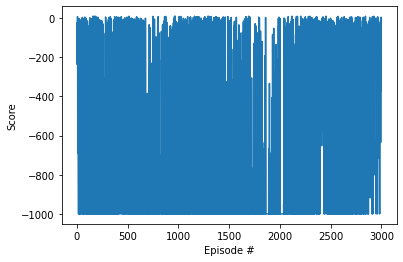

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In [8]:
env = gym.make('CartPole-v0')

state = env.reset()
for t in range(1000):
    action, _ = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()

AssertionError: 2 (<class 'int'>) invalid